In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: Juan Jose Usuga Giraldo 1020482080
*Métodos computacionales 2024-II*

---

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [3]:
from scipy.interpolate import lagrange

# Datos del problema
t_values = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # Tiempo en segundos
i_values = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # Corriente en Amperios

# Crear DataFrame con los datos
df = pd.DataFrame({'t': t_values, 'I': i_values})

# Método de diferencias finitas de tres puntos para la derivada numérica
def derivada_diferencias_finitas(t, I):
    n = len(t)
    dI_dt = np.zeros(n)

    for i in range(1, n - 1):  # Método de tres puntos en valores internos
        dI_dt[i] = (I[i + 1] - I[i - 1]) / (t[i + 1] - t[i - 1])

    # Diferencias hacia adelante y atrás para los extremos
    dI_dt[0] = (I[1] - I[0]) / (t[1] - t[0])
    dI_dt[-1] = (I[-1] - I[-2]) / (t[-1] - t[-2])

    return dI_dt

# Calcular la derivada numérica
dI_dt_num = derivada_diferencias_finitas(t_values, i_values)

# Interpolar con un polinomio de Lagrange
x_sym = sp.Symbol('x')  # Variable simbólica
polinomio_interp = lagrange(t_values, i_values)  # Polinomio de interpolación
polinomio_simb = sum(coef * x_sym**i for i, coef in enumerate(reversed(polinomio_interp.coefficients)))  # Convertir a sympy

# Derivar el polinomio
polinomio_derivado_simb = sp.diff(polinomio_simb, x_sym)

# Evaluar la derivada en los puntos dados
dI_dt_poly = np.array([polinomio_derivado_simb.subs(x_sym, t) for t in t_values], dtype=np.float64)

# Definir constantes del circuito
L = 0.98  # Inductancia en Henrios
R = 0.142  # Resistencia en Ohmios

# Calcular el voltaje usando la ecuación de Kirchhoff
epsilon_num = L * dI_dt_num + R * i_values  # Usando derivada numérica
epsilon_poly = L * dI_dt_poly + R * i_values  # Usando derivada del polinomio

# Agregar resultados al DataFrame
df["dI/dt (numérico)"] = dI_dt_num
df["ε(t) (numérico)"] = epsilon_num
df["dI/dt (polinomio)"] = dI_dt_poly
df["ε(t) (polinomio)"] = epsilon_poly

df


,t,I,dI/dt (numérico),ε(t) (numérico),dI/dt (polinomio),ε(t) (polinomio)
0,1.00,3.10,2.0,2.40020,3.166667,3.543533
1,1.01,3.12,2.0,2.40304,1.500000,1.913040
2,1.02,3.14,3.0,3.38588,2.833333,3.222547
3,1.03,3.18,5.0,5.35156,5.166667,5.514893
4,1.04,3.24,6.0,6.34008,6.500000,6.830080


# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

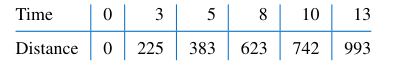



In [5]:
# Datos de tiempo y distancia
t_vals = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en segundos
d_vals = np.array([0, 225, 383, 623, 742, 993])  # Distancia en metros

# Calcular velocidad instantánea con diferencias finitas
def velocidad_diferencias_finitas(t, d):
    n = len(t)
    v = np.zeros(n)

    for i in range(1, n - 1):  # Diferencias centradas para valores internos
        v[i] = (d[i + 1] - d[i - 1]) / (t[i + 1] - t[i - 1])

    # Diferencias hacia adelante y atrás para los extremos
    v[0] = (d[1] - d[0]) / (t[1] - t[0])
    v[-1] = (d[-1] - d[-2]) / (t[-1] - t[-2])

    return v

# Calcular velocidades instantáneas
v_instantanea = velocidad_diferencias_finitas(t_vals, d_vals)

# Interpolación con un polinomio de Lagrange
polinomio_velocidad = lagrange(t_vals, v_instantanea)
v_12 = polinomio_velocidad(12)  # Evaluar en t = 12

# Crear DataFrame con resultados
df_velocidad = pd.DataFrame({"t (s)": t_vals, "Distancia (m)": d_vals, "Velocidad (m/s)": v_instantanea})
df_velocidad, v_12


(   t (s)  Distancia (m)  Velocidad (m/s)
 0      0              0        75.000000
 1      3            225        76.600000
 2      5            383        79.600000
 3      8            623        71.800000
 4     10            742        74.000000
 5     13            993        83.666667,
 83.75199999999961)

# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

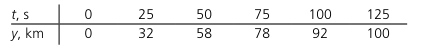

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

In [6]:
# Datos del cohete: tiempo (s) y distancia (km)
t_cohete = np.array([0, 25, 50, 75, 100, 125])  # Tiempo en segundos
y_cohete = np.array([0, 32, 58, 78, 92, 100])   # Distancia en kilómetros

# Calcular velocidad instantánea con diferencias finitas
v_cohete = velocidad_diferencias_finitas(t_cohete, y_cohete)  # Función ya definida antes

# Interpolación con un polinomio de Lagrange para la distancia
polinomio_distancia = lagrange(t_cohete, y_cohete)

# Interpolación con un polinomio de Lagrange para la velocidad
polinomio_velocidad = lagrange(t_cohete, v_cohete)

# Crear DataFrame con los resultados
df_cohete = pd.DataFrame({"t (s)": t_cohete, "Distancia (km)": y_cohete, "Velocidad (km/s)": v_cohete})

df_cohete


,t (s),Distancia (km),Velocidad (km/s)
0,0,0,1.28
1,25,32,1.16
2,50,58,0.92
3,75,78,0.68
4,100,92,0.44
5,125,100,0.32


In [7]:
# Calcular aceleración instantánea con diferencias finitas
def aceleracion_diferencias_finitas(t, v):
    n = len(t)
    a = np.zeros(n)

    for i in range(1, n - 1):  # Diferencias centradas para valores internos
        a[i] = (v[i + 1] - v[i - 1]) / (t[i + 1] - t[i - 1])

    # Diferencias hacia adelante y atrás para los extremos
    a[0] = (v[1] - v[0]) / (t[1] - t[0])
    a[-1] = (v[-1] - v[-2]) / (t[-1] - t[-2])

    return a

# Calcular aceleración instantánea
a_cohete = aceleracion_diferencias_finitas(t_cohete, v_cohete)

# Agregar aceleración al DataFrame
df_cohete["Aceleración (km/s²)"] = a_cohete

df_cohete


,t (s),Distancia (km),Velocidad (km/s),Aceleración (km/s²)
0,0,0,1.28,-0.0048
1,25,32,1.16,-0.0072
2,50,58,0.92,-0.0096
3,75,78,0.68,-0.0096
4,100,92,0.44,-0.0072
5,125,100,0.32,-0.0048


#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

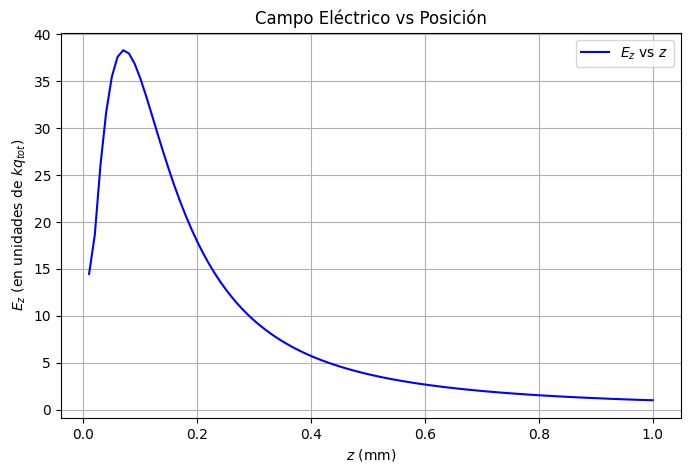

(z/(z**2 + 0.01)**(3/2), 35.35533905932737)

In [10]:
# Definir variables simbólicas
z = sp.Symbol('z', real=True, positive=True)
R = 0.1  # Radio en mm, ya rescalado
V = 1 / sp.sqrt(z**2 + R**2)  # Potencial reescalado en unidades de kq_tot

# Calcular el campo eléctrico Ez simbólicamente
Ez_sym = -sp.diff(V, z)
Ez_sym_simplified = sp.simplify(Ez_sym)

# Convertir la expresión simbólica en función numérica
Ez_func = sp.lambdify(z, Ez_sym_simplified, 'numpy')

# Calcular Ez en z = 0.1 mm usando numpy.gradient
z_vals = np.linspace(0.01, 1, 100)  # Valores de z > 0
V_vals = 1 / np.sqrt(z_vals**2 + R**2)  # Evaluar V numéricamente
Ez_vals = -np.gradient(V_vals, z_vals)  # Diferenciación numérica

# Graficar E vs z
plt.figure(figsize=(8, 5))
plt.plot(z_vals, Ez_vals, label=r'$E_z$ vs $z$', color='b')
plt.xlabel(r'$z$ (mm)')
plt.ylabel(r'$E_z$ (en unidades de $kq_{tot}$)')
plt.title('Campo Eléctrico vs Posición')
plt.legend()
plt.grid()
plt.show()

# Calcular el campo en z = 0.1 mm
Ez_01 = Ez_func(0.1)  # Evaluación con función simbólica

Ez_sym_simplified, Ez_01
